<a href="https://colab.research.google.com/github/nano2547/PS-Research/blob/main/AL012CorrCovTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

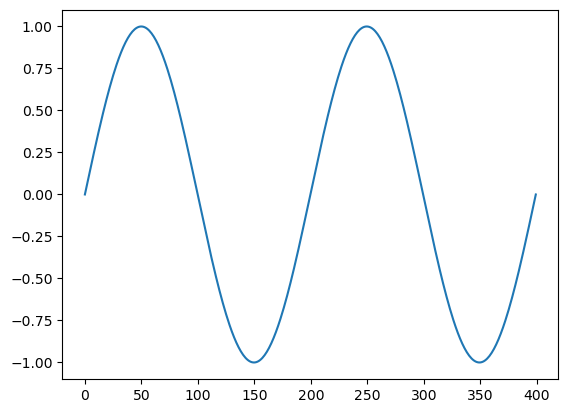

In [ ]:
x = np.array([np.sin(i) for i in np.linspace(0, 4 * np.pi, 400)])
plt.plot(x)

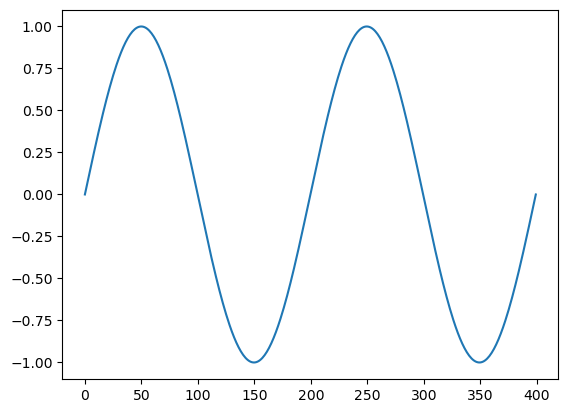

In [ ]:
s = 0
y = np.array([np.sin(i) for i in np.linspace(s, 4 * np.pi+s, 400)])
plt.plot(y)

In [ ]:
np.cov(x, y, ddof=0), np.corrcoef(x, y), np.var(x), np.var(y)

(array([[0.49875, 0.49875],
        [0.49875, 0.49875]]),
 array([[1., 1.],
        [1., 1.]]),
 0.49875,
 0.49875)

(array([[0.49807319, 0.49807319],
        [0.49807319, 0.49807319]]),
 array([[1., 1.],
        [1., 1.]]),
 0.4980731855623706,
 0.4980731855623706,
 1.0)

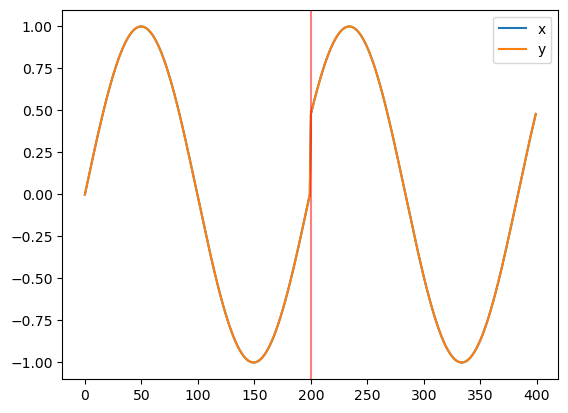

In [ ]:
# phase normal event: check corr (no change)
shift = 0.5
x = np.array([np.sin(i) for i in np.linspace(0, 2 * np.pi, 200)] + [np.sin(i) for i in np.linspace(shift, 2 * np.pi+shift, 200)])
y = np.array([np.sin(i) for i in np.linspace(s, 2 * np.pi+s, 200)] + [np.sin(i) for i in np.linspace(shift+s, 2 * np.pi+shift+s, 200)])
plt.plot(x, label="x")
plt.plot(y, label="y")
plt.axvline(200, color="red", alpha=0.5)
plt.legend()
np.cov(x, y, ddof=0), np.corrcoef(x, y), np.var(x), np.var(y), np.var(x) / np.var(y)

(array([[1.24375, 1.24375],
        [1.24375, 1.24375]]),
 array([[1., 1.],
        [1., 1.]]),
 1.24375,
 1.24375,
 1.0)

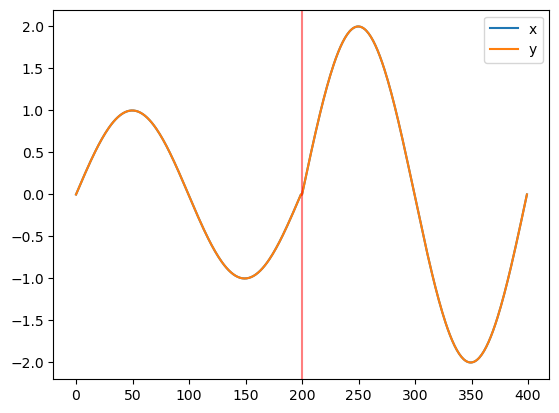

In [ ]:
# amplitude normal event: check cov (no change)
x = np.array([np.sin(i) for i in np.linspace(0, 2 * np.pi, 200)] + [2*np.sin(i) for i in np.linspace(0, 2 * np.pi, 200)])
y = np.array([np.sin(i) for i in np.linspace(s, 2 * np.pi+s, 200)] + [2*np.sin(i) for i in np.linspace(s, 2 * np.pi+s, 200)])
plt.plot(x, label="x")
plt.plot(y, label="y")
plt.axvline(200, color="red", alpha=0.5)
plt.legend()
np.cov(x, y, ddof=0), np.corrcoef(x, y), np.var(x), np.var(y), np.var(x) / np.var(y)

(array([[1.24375   , 0.68534732],
        [0.68534732, 0.49807319]]),
 array([[1.        , 0.87075824],
        [0.87075824, 1.        ]]),
 1.24375,
 0.4980731855623706,
 2.497122985240997)

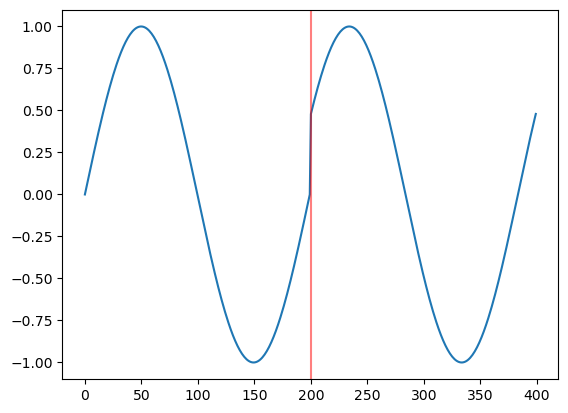

In [ ]:
# phase attack: check corr
y = np.array([np.sin(i) for i in np.linspace(s, 2 * np.pi+s, 200)] + [np.sin(i) for i in np.linspace(shift, 2 * np.pi+shift, 200)])
plt.plot(y)
plt.axvline(200, color="red", alpha=0.5)
np.cov(x, y, ddof=0), np.corrcoef(x, y), np.var(x), np.var(y), np.var(x) / np.var(y)

(array([[1.24375, 1.24375],
        [1.24375, 1.24375]]),
 array([[1., 1.],
        [1., 1.]]),
 1.24375,
 1.24375,
 1.0)

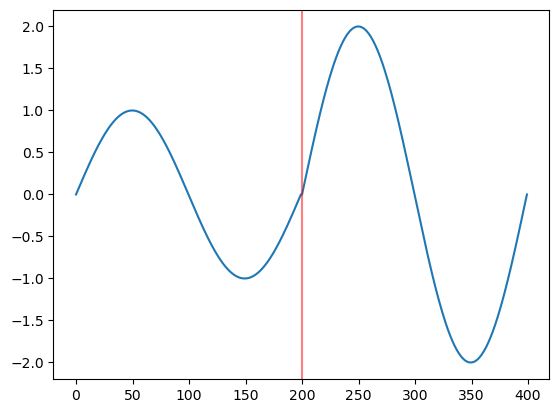

In [ ]:
# amplitude attack: check cov
y = np.array([np.sin(i) for i in np.linspace(s, 2 * np.pi+s, 200)] + [2*np.sin(i) for i in np.linspace(s, 2 * np.pi+s, 200)])
plt.plot(y)
plt.axvline(200, color="red", alpha=0.5)
np.cov(x, y, ddof=0), np.corrcoef(x, y), np.var(x), np.var(y), np.var(x) / np.var(y)

In [ ]:
d = {"cov": [], "corr": [], "varr": []}

# normal
shift = 0
x = np.array([np.sin(i) for i in np.linspace(0, 4 * np.pi, 400)])
y = np.array([np.sin(i) for i in np.linspace(shift, 4 * np.pi+shift, 400)])
cov = np.cov(x, y)
d["cov"].append(cov[0,1])
d["corr"].append(np.corrcoef(x, y)[0,1])
d["varr"].append(cov[0,0]/cov[1,1])

# phase normal event: check corr (no change)
phase_shift = 1
x = np.array([np.sin(i) for i in np.linspace(0, 2 * np.pi, 200)] + \
             [np.sin(i) for i in np.linspace(phase_shift, 2 * np.pi+phase_shift, 200)])
y = np.array([np.sin(i) for i in np.linspace(shift, 2 * np.pi+shift, 200)] + \
             [np.sin(i) for i in np.linspace(shift+phase_shift, 2 * np.pi+shift+phase_shift, 200)])
cov = np.cov(x, y)
d["cov"].append(cov[0,1])
d["corr"].append(np.corrcoef(x, y)[0,1])
d["varr"].append(cov[0,0]/cov[1,1])

# amplitude normal event: check cov (no change)
amp = 3
x = np.array([np.sin(i) for i in np.linspace(0, 2 * np.pi, 200)] + \
             [amp*np.sin(i) for i in np.linspace(0, 2 * np.pi, 200)])
y = np.array([np.sin(i) for i in np.linspace(shift, 2 * np.pi+shift, 200)] + \
             [amp*np.sin(i) for i in np.linspace(shift, 2 * np.pi+shift, 200)])
cov = np.cov(x, y)
d["cov"].append(cov[0,1])
d["corr"].append(np.corrcoef(x, y)[0,1])
d["varr"].append(cov[0,0]/cov[1,1])

# phase normal event: check corr (no change)
phase_shift = 1
x = np.array([np.sin(i) for i in np.linspace(0, 4 * np.pi, 400)])
y = np.array([np.sin(i) for i in np.linspace(shift, 2 * np.pi+shift, 200)] + \
             [np.sin(i) for i in np.linspace(shift+phase_shift, 2 * np.pi+shift+phase_shift, 200)])
cov = np.cov(x, y)
d["cov"].append(cov[0,1])
d["corr"].append(np.corrcoef(x, y)[0,1])
d["varr"].append(cov[0,0]/cov[1,1])

# amplitude normal event: check cov (no change)
amp = 3
x = np.array([np.sin(i) for i in np.linspace(0, 4 * np.pi, 400)])
y = np.array([np.sin(i) for i in np.linspace(shift, 2 * np.pi+shift, 200)] + \
             [amp*np.sin(i) for i in np.linspace(shift, 2 * np.pi+shift, 200)])
cov = np.cov(x, y)
d["cov"].append(cov[0,1])
d["corr"].append(np.corrcoef(x, y)[0,1])
d["varr"].append(cov[0,0]/cov[1,1])

pd.DataFrame(data=d,
#              columns=["Covariance", "Correlation", "Variance Ratio"],
             index=["Normal", "Normal Phase (Corr)", "Normal Amplitude (Var)", "Attack Phase (Corr)", "Attack Amplitude (Var)"])

,cov,corr,varr
Normal,0.500000,1.000000,1.000000
Normal Phase (Corr),0.500517,1.000000,1.000000
Normal Amplitude (Var),2.493734,1.000000,1.000000
Attack Phase (Corr),0.386243,0.772087,0.998967
Attack Amplitude (Var),0.998704,0.894389,0.200503


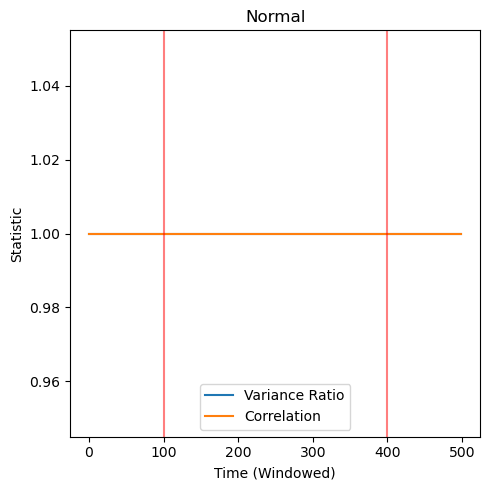

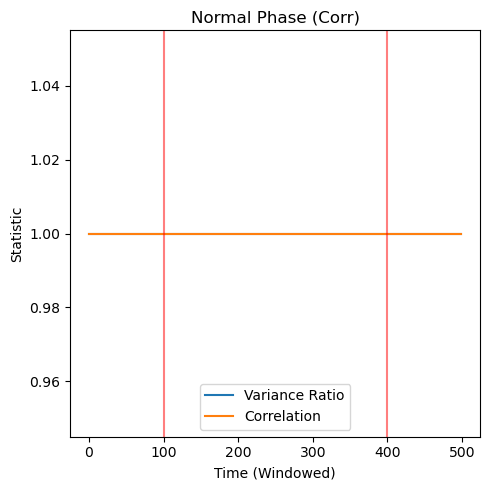

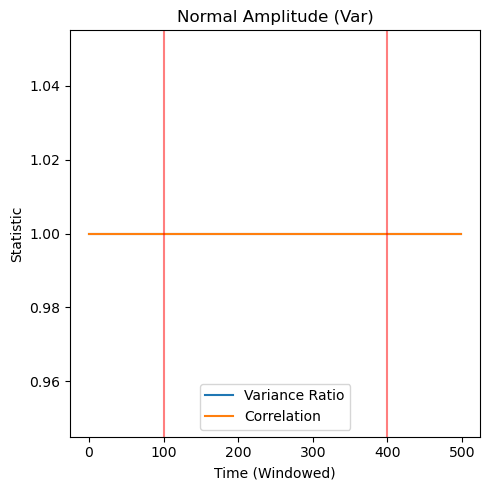

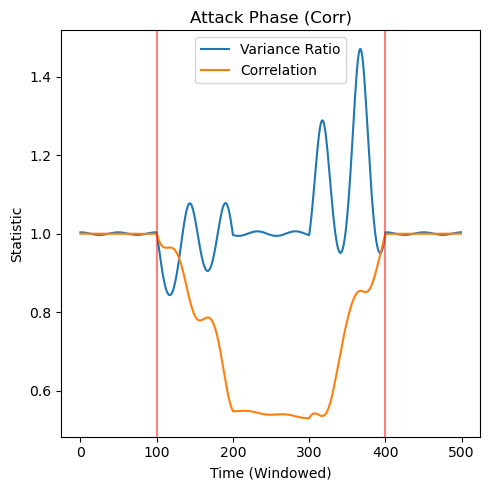

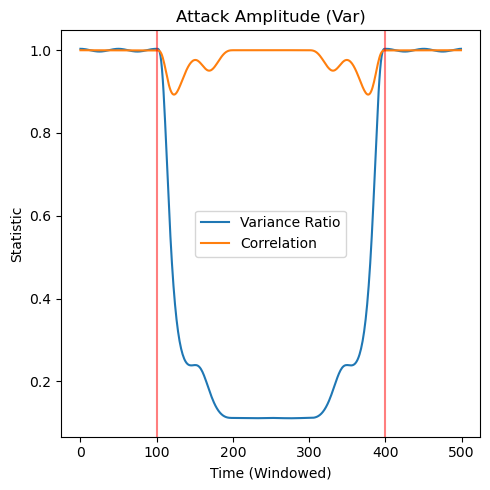

In [ ]:
def plot(x, y, title):

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(5, 5)

    period = 100

    cov = [np.cov(x[i:i+period], y[i:i+period]) for i in range(len(x) - period)]
    varr = [c[0,0] / c[1,1] for c in cov]
    corr = [np.corrcoef(x[i:i+period], y[i:i+period])[0,1] for i in range(len(x) - period)]

#     ax.plot(cov, label="Covariance")

    ax.plot(varr, label="Variance Ratio")
    ax.plot(corr, label="Correlation")
    ax.axvline(200-period, color="red", alpha=0.5)
    ax.axvline(400, color="red", alpha=0.5)
    ax.set_xlabel("Time (Windowed)")
    ax.set_ylabel("Statistic")
    ax.set_title(title)
    ax.legend()

    plt.tight_layout()
    plt.plot()


# fig, axes = plt.subplots(5, 1)
# fig.set_size_inches(5, 25)
titles = ["Normal", "Normal Phase (Corr)",
                           "Normal Amplitude (Var)", "Attack Phase (Corr)",
                           "Attack Amplitude (Var)"]

# normal
shift = 0
x = (np.array([np.sin(i) for i in np.linspace(0, 2 * 6 * np.pi, 600)]))
y = (np.array([np.sin(i) for i in np.linspace(shift, 2 * 6 * np.pi+shift, 600)]))
plot(x, y, titles[0])

# phase normal event: check corr (no change)
phase_shift = 1
x = np.array([np.sin(i) for i in np.linspace(0, 2 * 2 * np.pi, 200)] + \
             [np.sin(i) for i in np.linspace(phase_shift, 2 * 2 * np.pi+phase_shift, 200)]+ \
             [np.sin(i) for i in np.linspace(0, 2 * 2 * np.pi, 200)])
y = np.array([np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)] + \
             [np.sin(i) for i in np.linspace(shift+phase_shift, 2 * 2 * np.pi+shift+phase_shift, 200)]+ \
             [np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)])
plot(x, y, titles[1])

# amplitude normal event: check cov (no change)
amp = 3
x = np.array([np.sin(i) for i in np.linspace(0, 2 * 2 * np.pi, 200)] + \
             [amp*np.sin(i) for i in np.linspace(0, 2 * 2 * np.pi, 200)]+ \
             [np.sin(i) for i in np.linspace(0, 2 * 2 * np.pi, 200)])
y = np.array([np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)] + \
             [amp*np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)]+ \
             [np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)])
plot(x, y, titles[2])

# phase normal event: check corr (no change)
phase_shift = 1
x = np.array([np.sin(i) for i in np.linspace(0, 2 * 6 * np.pi, 600)])
y = np.array([np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)] + \
             [np.sin(i) for i in np.linspace(shift+phase_shift, 2 * 2 * np.pi+shift+phase_shift, 200)]+ \
             [np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)])
plot(x, y, titles[3])

# amplitude normal event: check cov (no change)
amp = 3
x = np.array([np.sin(i) for i in np.linspace(0, 2 * 6 * np.pi, 600)])
y = np.array([np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)] + \
             [amp*np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)]+ \
             [np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)])
plot(x, y, titles[-1])

# plt.tight_layout()
# plt.plot()

In [2]:
data_dir = "/content/drive/MyDrive/"
training_path = "/content/Normalized_Data.csv"
df = pd.read_csv(training_path, skiprows=[0,1,2,3,5])

df

,Time,V_BUS115KV2_AN,V_BUS13KV2_AN,Unnamed: 3,Unnamed: 4,Time.1,V_BUS115KV2_AN.1,V_BUS13KV2_AN.1,Unnamed: 8,Unnamed: 9,Time.2,V_BUS115KV2_AN.2,V_BUS13KV2_AN.2,Unnamed: 13,Sampling rate,80.0,sample/cycle,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0.0,1.5112,-0.131,NaN,NaN,0.0,0.0000,0.0000,NaN,NaN,0.0,0.0000,NaN,NaN,Each,360.0,deg,is,16666.667,microseconds
1,208.0,34481.5000,2635.428,NaN,NaN,208.0,0.3672,0.2339,NaN,NaN,208.0,0.3672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,417.0,151241.7000,13714.660,NaN,NaN,417.0,1.6107,1.2172,NaN,NaN,417.0,1.6107,NaN,NaN,then,30.0,deg,is,1388.889,microseconds
3,625.0,173384.0000,15567.540,NaN,NaN,625.0,1.8465,1.3816,NaN,NaN,625.0,1.8465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,833.0,99362.0800,8736.098,NaN,NaN,833.0,1.0582,0.7753,NaN,NaN,833.0,1.0582,NaN,NaN,NaN,NaN,NaN,NaN,6.700,Samples
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9391,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = df[df['Time']> 0.25e4].iloc[:, 1:3]
data

,V_BUS115KV2_AN,V_BUS13KV2_AN
13,77650.930,2777.7330
14,82488.990,3145.6310
15,43419.680,-216.9358
16,1299.123,-4082.5900
17,-5168.207,-5121.8300
...,...,...
795,86174.530,11118.8600
796,88819.510,11007.1100
797,90917.240,10827.5500
798,92455.310,10581.0300


In [4]:
data_t = df[df['Time']> 1e4].iloc[:, 11:13]

data_t

,V_BUS115KV2_AN.2,V_BUS13KV2_AN.2
49,-0.7916,-0.7559
50,-0.7406,-0.7459
51,-0.6585,-0.7182
52,-0.5770,-0.6500
53,-0.5187,-0.5610
...,...,...
795,0.9178,0.8867
796,0.9459,0.9187
797,0.9683,0.9450
798,0.9846,0.9654


In [5]:
def plot(x, y, title):

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(5, 5)

    period = 160

    cov = [np.cov(x[i:i+period], y[i:i+period]) for i in range(len(x) - period)]
    varr = [c[0,0] / c[1,1] for c in cov]
    corr = [np.corrcoef(x[i:i+period], y[i:i+period])[0,1] for i in range(len(x) - period)]

#     ax.plot(cov, label="Covariance")

    ax.plot(varr, label="Variance Ratio")
    ax.plot(corr, label="Correlation")
    ax.set_xlabel(r"$t$ (Sample Number)")
    ax.set_ylabel("Statistic")
    ax.set_title(title)
    ax.legend()

    plt.tight_layout()
    plt.plot()

num_periods = 9

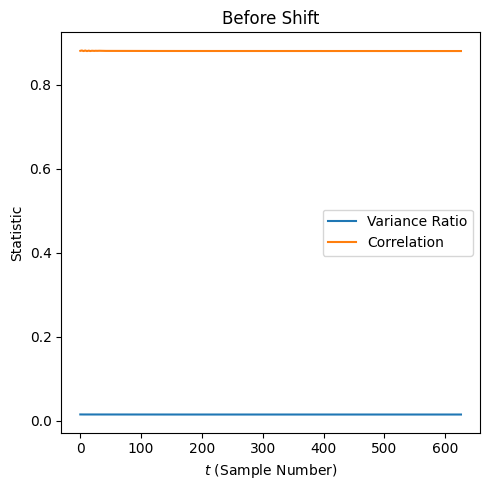

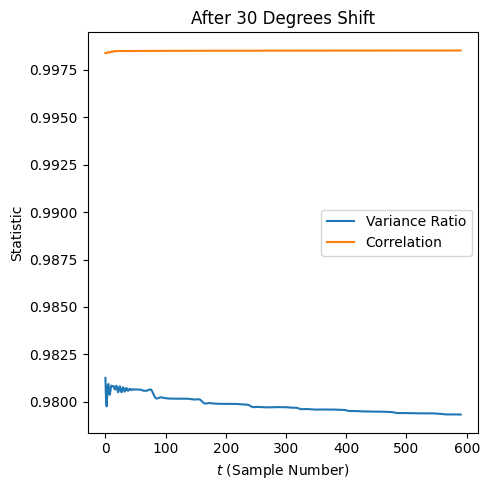

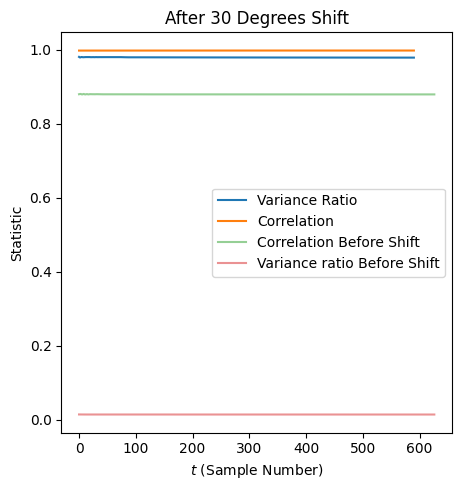

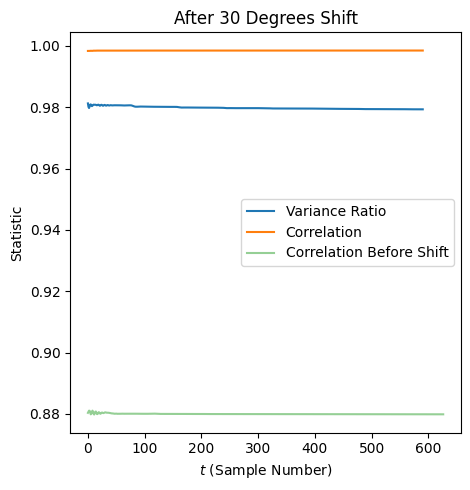

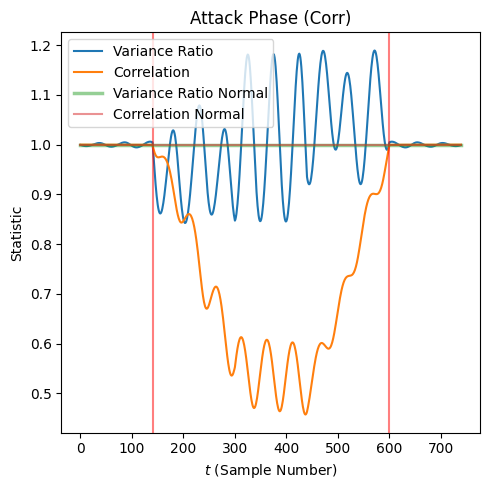

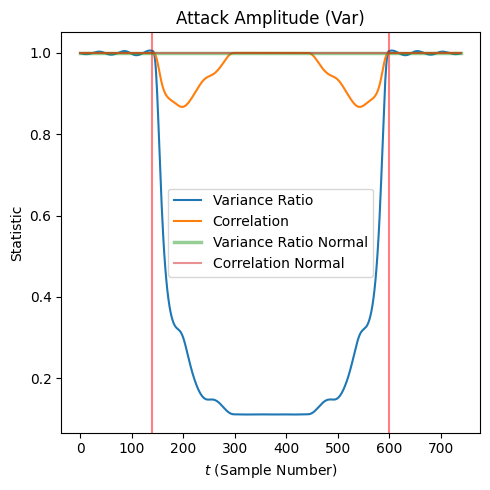

In [17]:
period = 160
plot(data[' V_BUS115KV2_AN']/np.var(data[' V_BUS115KV2_AN']),data[' V_BUS13KV2_AN']/np.var(data[' V_BUS13KV2_AN']), "Before Shift", False)
plot(data_t[' V_BUS115KV2_AN.2']/np.var(data_t[' V_BUS115KV2_AN.2']), data_t[' V_BUS13KV2_AN.2']/np.var(data_t[' V_BUS13KV2_AN.2']), "After 30 Degrees Shift", False)

plot(data_t[' V_BUS115KV2_AN.2']/np.var(data_t[' V_BUS115KV2_AN.2']), data_t[' V_BUS13KV2_AN.2']/np.var(data_t[' V_BUS13KV2_AN.2']), "After 30 Degrees Shift", False)
z = data[' V_BUS115KV2_AN']/np.var(data[' V_BUS115KV2_AN'])
a = data[' V_BUS13KV2_AN']/np.var(data[' V_BUS13KV2_AN'])
cov = [np.cov(z[i:i+period], a[i:i+period]) for i in range(len(z) - period)]
varr = [c[0,0] / c[1,1] for c in cov]
corr = [np.corrcoef(z[i:i+period], a[i:i+period])[0,1] for i in range(len(z) - period)]
plt.plot(corr, label="Correlation Before Shift",alpha = 0.5)
plt.plot(varr, label="Variance ratio Before Shift", alpha = 0.5)
plt.legend()
plot(data_t[' V_BUS115KV2_AN.2']/np.var(data_t[' V_BUS115KV2_AN.2']), data_t[' V_BUS13KV2_AN.2']/np.var(data_t[' V_BUS13KV2_AN.2']), "After 30 Degrees Shift", False)
z = data[' V_BUS115KV2_AN']/np.var(data[' V_BUS115KV2_AN'])
a = data[' V_BUS13KV2_AN']/np.var(data[' V_BUS13KV2_AN'])
cov = [np.cov(z[i:i+period], a[i:i+period]) for i in range(len(z) - period)]
varr = [c[0,0] / c[1,1] for c in cov]
corr = [np.corrcoef(z[i:i+period], a[i:i+period])[0,1] for i in range(len(z) - period)]
plt.plot(corr, label="Correlation Before Shift",alpha = 0.5)
plt.legend()


# longer window

def plot(x, y, title, attack = False):

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(5, 5)

    period = 160

    cov = [np.cov(x[i:i+period], y[i:i+period]) for i in range(len(x) - period)]
    varr = [c[0,0] / c[1,1] for c in cov]
    corr = [np.corrcoef(x[i:i+period], y[i:i+period])[0,1] for i in range(len(x) - period)]

#     ax.plot(cov, label="Covariance")

    ax.plot(varr, label="Variance Ratio")
    ax.plot(corr, label="Correlation")
    if attack:
      ax.axvline(300-period, color="red", alpha=0.5)
      ax.axvline(700-100, color="red", alpha=0.5)
    ax.set_xlabel(r"$t$ (Sample Number)")
    ax.set_ylabel("Statistic")
    ax.set_title(title)
    ax.legend()

    plt.tight_layout()
    plt.plot()


# fig, axes = plt.subplots(5, 1)
# fig.set_size_inches(5, 25)
titles = ["Normal", "Normal Phase (Corr)",
                           "Normal Amplitude (Var)", "Attack Phase (Corr)",
                           "Attack Amplitude (Var)"]

num_periods = 9
shift = 0
# phase attack event: check corr
phase_shift = 1
x = np.array([np.sin(i) for i in np.linspace(0, 2 * num_periods * np.pi, 900)])
y = np.array([np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)] + \
             [np.sin(i) for i in np.linspace(shift+phase_shift, 3 * 2 * np.pi+shift+phase_shift, 300)]+ \
             [np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)])
c = np.array([np.sin(i) for i in np.linspace(0, 3 * 2 * np.pi, 300)] + \
             [np.sin(i) for i in np.linspace(phase_shift, 3 * 2 * np.pi+phase_shift, 300)]+ \
             [np.sin(i) for i in np.linspace(0, 3 * 2 * np.pi, 300)])
b = np.array([np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)] + \
             [np.sin(i) for i in np.linspace(shift+phase_shift, 3 * 2 * np.pi+shift+phase_shift, 300)]+ \
             [np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)])
plot(x, y, titles[3], attack = True)

period = 160

cov = [np.cov(c[i:i+period], b[i:i+period]) for i in range(len(c) - period)]
varr = [c[0,0] / c[1,1] for c in cov]
corr = [np.corrcoef(c[i:i+period], b[i:i+period])[0,1] for i in range(len(c) - period)]

#     ax.plot(cov, label="Covariance")

plt.plot(varr, label="Variance Ratio Normal",linewidth =2.5, alpha=0.5)
plt.plot(corr, label="Correlation Normal",alpha = 0.5)
plt.legend()


# amplitude attack event: check var
amp = 3
x = np.array([np.sin(i) for i in np.linspace(0, 2 * num_periods * np.pi, 900)])
y = np.array([np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)] + \
             [amp*np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)]+ \
             [np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)])
z = np.array([np.sin(i) for i in np.linspace(0, 3 * 2 * np.pi, 300)] + \
             [amp*np.sin(i) for i in np.linspace(0, 3 * 2 * np.pi, 300)]+ \
             [np.sin(i) for i in np.linspace(0, 3 * 2 * np.pi, 300)])
a = np.array([np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)] + \
             [amp*np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)]+ \
             [np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)])

plot(x, y, titles[-1], True)
period = 160

cov = [np.cov(z[i:i+period], a[i:i+period]) for i in range(len(z) - period)]
varr = [c[0,0] / c[1,1] for c in cov]
corr = [np.corrcoef(z[i:i+period], a[i:i+period])[0,1] for i in range(len(z) - period)]

#     ax.plot(cov, label="Covariance")

plt.plot(varr, label="Variance Ratio Normal",linewidth =2.5, alpha=0.5)
plt.plot(corr, label="Correlation Normal",alpha = 0.5)
plt.legend()


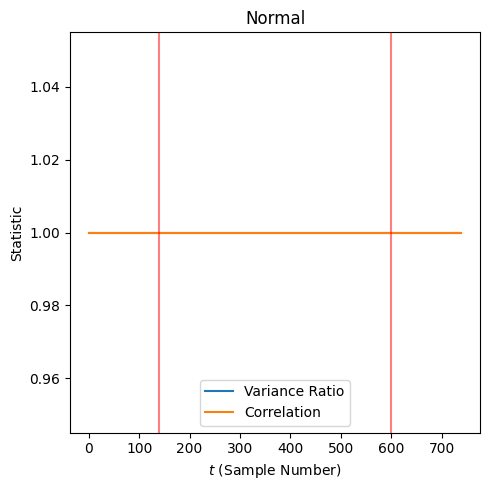

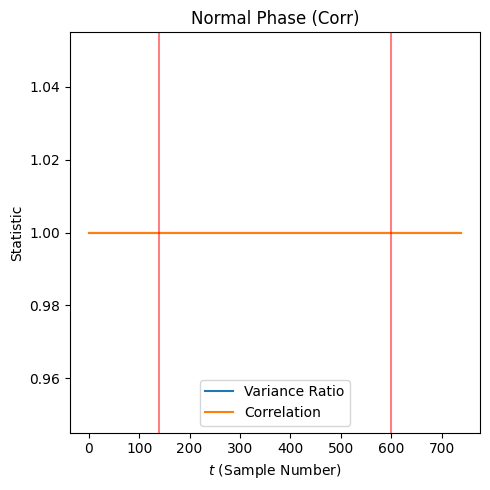

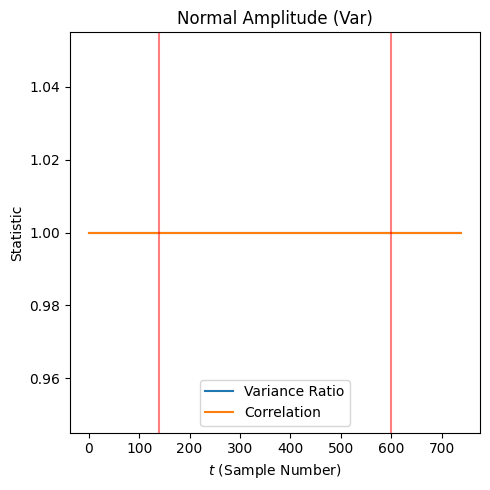

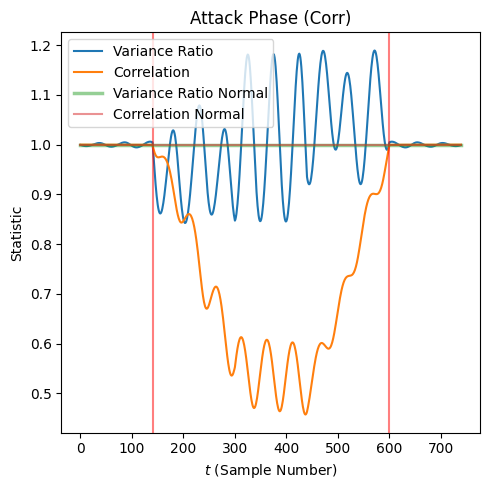

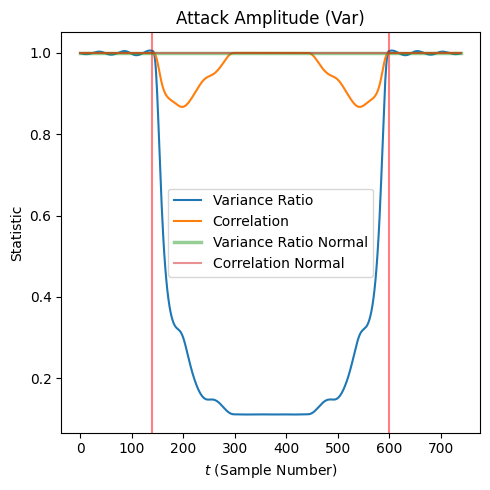

In [ ]:
# longer window

def plot(x, y, title):

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(5, 5)

    period = 160

    cov = [np.cov(x[i:i+period], y[i:i+period]) for i in range(len(x) - period)]
    varr = [c[0,0] / c[1,1] for c in cov]
    corr = [np.corrcoef(x[i:i+period], y[i:i+period])[0,1] for i in range(len(x) - period)]

#     ax.plot(cov, label="Covariance")

    ax.plot(varr, label="Variance Ratio")
    ax.plot(corr, label="Correlation")
    ax.axvline(300-period, color="red", alpha=0.5)
    ax.axvline(700-100, color="red", alpha=0.5)
    ax.set_xlabel(r"$t$ (Sample Number)")
    ax.set_ylabel("Statistic")
    ax.set_title(title)
    ax.legend()

    plt.tight_layout()
    plt.plot()


# fig, axes = plt.subplots(5, 1)
# fig.set_size_inches(5, 25)
titles = ["Normal", "Normal Phase (Corr)",
                           "Normal Amplitude (Var)", "Attack Phase (Corr)",
                           "Attack Amplitude (Var)"]

num_periods = 9

# normal
shift = 0
x = (np.array([np.sin(i) for i in np.linspace(0, 2 * num_periods * np.pi, 900)]))
y = (np.array([np.sin(i) for i in np.linspace(shift, 2 * num_periods * np.pi+shift, 900)]))
plot(x, y, titles[0])

# phase normal event: check corr (no change)
phase_shift = 1
x = np.array([np.sin(i) for i in np.linspace(0, 3 * 2 * np.pi, 300)] + \
             [np.sin(i) for i in np.linspace(phase_shift, 3 * 2 * np.pi+phase_shift, 300)]+ \
             [np.sin(i) for i in np.linspace(0, 3 * 2 * np.pi, 300)])
y = np.array([np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)] + \
             [np.sin(i) for i in np.linspace(shift+phase_shift, 3 * 2 * np.pi+shift+phase_shift, 300)]+ \
             [np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)])
plot(x, y, titles[1])

# amplitude normal event: check cov (no change)
amp = 3
x = np.array([np.sin(i) for i in np.linspace(0, 3 * 2 * np.pi, 300)] + \
             [amp*np.sin(i) for i in np.linspace(0, 3 * 2 * np.pi, 300)]+ \
             [np.sin(i) for i in np.linspace(0, 3 * 2 * np.pi, 300)])
y = np.array([np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)] + \
             [amp*np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)]+ \
             [np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)])
plot(x, y, titles[2])

# phase attack event: check corr
phase_shift = 1
x = np.array([np.sin(i) for i in np.linspace(0, 2 * num_periods * np.pi, 900)])
y = np.array([np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)] + \
             [np.sin(i) for i in np.linspace(shift+phase_shift, 3 * 2 * np.pi+shift+phase_shift, 300)]+ \
             [np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)])
c = np.array([np.sin(i) for i in np.linspace(0, 3 * 2 * np.pi, 300)] + \
             [np.sin(i) for i in np.linspace(phase_shift, 3 * 2 * np.pi+phase_shift, 300)]+ \
             [np.sin(i) for i in np.linspace(0, 3 * 2 * np.pi, 300)])
b = np.array([np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)] + \
             [np.sin(i) for i in np.linspace(shift+phase_shift, 3 * 2 * np.pi+shift+phase_shift, 300)]+ \
             [np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)])
plot(x, y, titles[3])

period = 160

cov = [np.cov(c[i:i+period], b[i:i+period]) for i in range(len(c) - period)]
varr = [c[0,0] / c[1,1] for c in cov]
corr = [np.corrcoef(c[i:i+period], b[i:i+period])[0,1] for i in range(len(c) - period)]

#     ax.plot(cov, label="Covariance")

plt.plot(varr, label="Variance Ratio Normal",linewidth =2.5, alpha=0.5)
plt.plot(corr, label="Correlation Normal",alpha = 0.5)
plt.legend()


# amplitude attack event: check var
amp = 3
x = np.array([np.sin(i) for i in np.linspace(0, 2 * num_periods * np.pi, 900)])
y = np.array([np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)] + \
             [amp*np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)]+ \
             [np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)])
z = np.array([np.sin(i) for i in np.linspace(0, 3 * 2 * np.pi, 300)] + \
             [amp*np.sin(i) for i in np.linspace(0, 3 * 2 * np.pi, 300)]+ \
             [np.sin(i) for i in np.linspace(0, 3 * 2 * np.pi, 300)])
a = np.array([np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)] + \
             [amp*np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)]+ \
             [np.sin(i) for i in np.linspace(shift, 3 * 2 * np.pi+shift, 300)])

plot(x, y, titles[-1])
period = 160

cov = [np.cov(z[i:i+period], a[i:i+period]) for i in range(len(z) - period)]
varr = [c[0,0] / c[1,1] for c in cov]
corr = [np.corrcoef(z[i:i+period], a[i:i+period])[0,1] for i in range(len(z) - period)]

#     ax.plot(cov, label="Covariance")

plt.plot(varr, label="Variance Ratio Normal",linewidth =2.5, alpha=0.5)
plt.plot(corr, label="Correlation Normal",alpha = 0.5)
plt.legend()


# plt.tight_layout()
# plt.plot()

[]

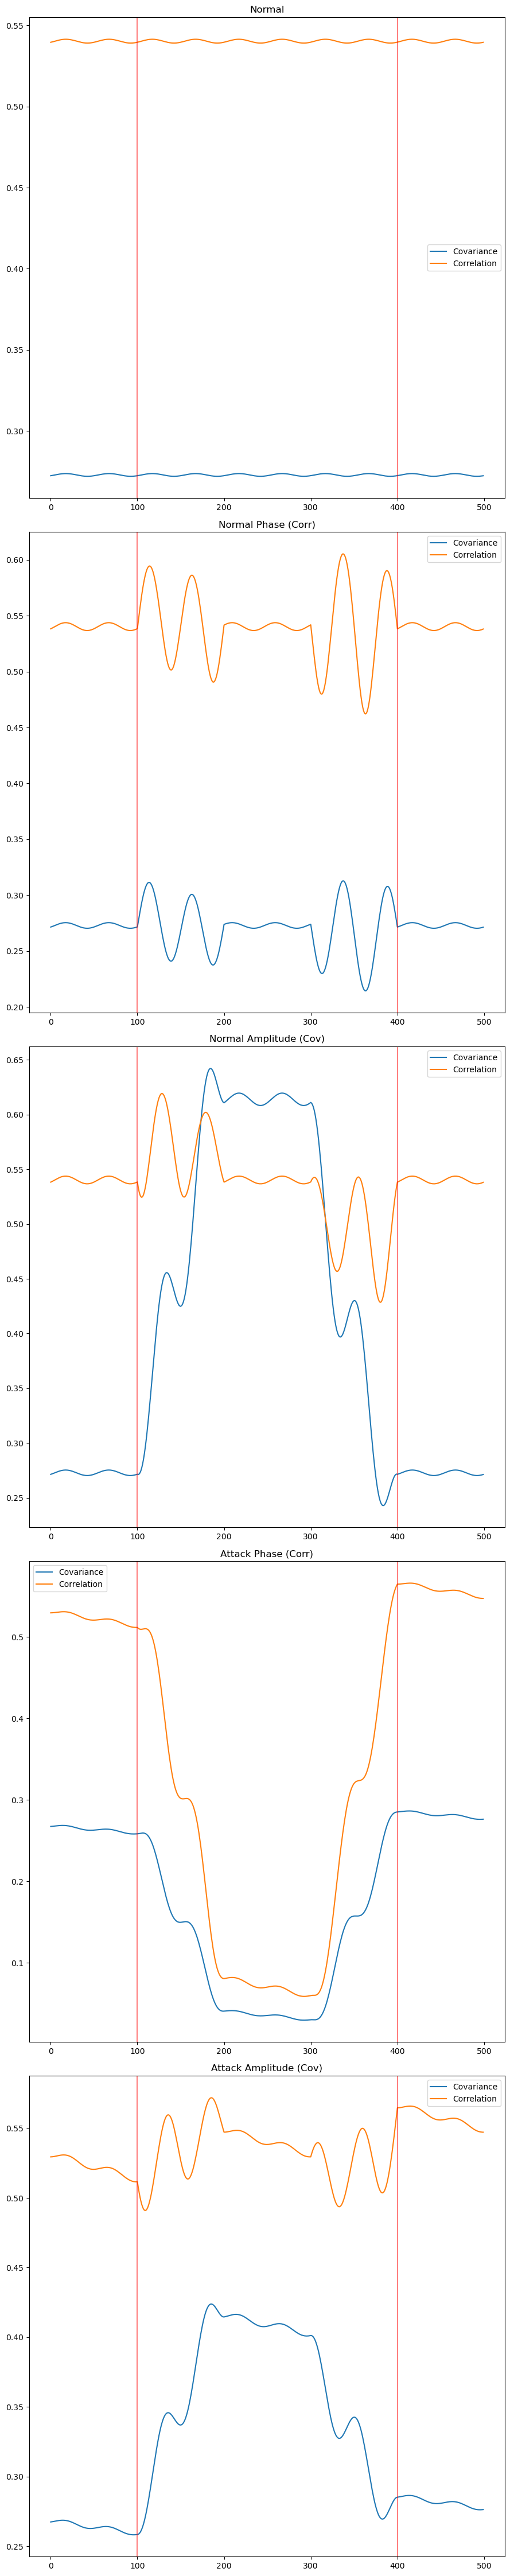

In [ ]:
# # normal
# shift = 1
# x = (np.array([np.sin(i) for i in np.linspace(0, 2 * 6 * np.pi, 600)]))
# y = (np.array([np.sin(i) for i in np.linspace(shift, 2 * 6 * np.pi+shift, 600)]))
# plot(x, y, axes[0], titles[0])

# # phase normal event: check corr (no change)
# phase_shift = .5
# x = np.array([np.sin(i) for i in np.linspace(0, 2 * 2 * np.pi, 200)] + \
#              [np.sin(i) for i in np.linspace(phase_shift, 2 * 2 * np.pi+phase_shift, 200)]+ \
#              [np.sin(i) for i in np.linspace(0, 2 * 2 * np.pi, 200)])
# y = np.array([np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)] + \
#              [np.sin(i) for i in np.linspace(shift+phase_shift, 2 * 2 * np.pi+shift+phase_shift, 200)]+ \
#              [np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)])
# plot(x, y, axes[1], titles[1])

# # amplitude normal event: check cov (no change)
# amp = 1.5
# x = np.array([np.sin(i) for i in np.linspace(0, 2 * 2 * np.pi, 200)] + \
#              [amp*np.sin(i) for i in np.linspace(0, 2 * 2 * np.pi, 200)]+ \
#              [np.sin(i) for i in np.linspace(0, 2 * 2 * np.pi, 200)])
# y = np.array([np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)] + \
#              [amp*np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)]+ \
#              [np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)])
# plot(x, y, axes[2], titles[2])

# # phase normal event: check corr (no change)
# phase_shift = .5
# x = np.array([np.sin(i) for i in np.linspace(0, 2 * 6 * np.pi, 600)])
# y = np.array([np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)] + \
#              [np.sin(i) for i in np.linspace(shift+phase_shift, 2 * 2 * np.pi+shift+phase_shift, 200)]+ \
#              [np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)])
# plot(x, y, axes[3], titles[3])

# # amplitude normal event: check cov (no change)
# amp = 1.5
# x = np.array([np.sin(i) for i in np.linspace(0, 2 * 6 * np.pi, 600)])
# y = np.array([np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)] + \
#              [amp*np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)]+ \
#              [np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)])
# plot(x, y, axes[-1], titles[-1])

# plt.tight_layout()
# plt.plot()

# Linear

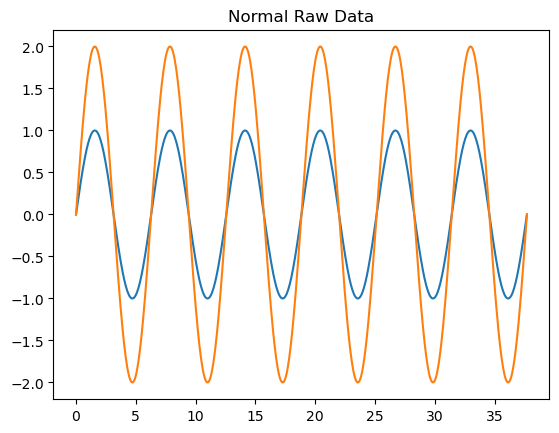

[]

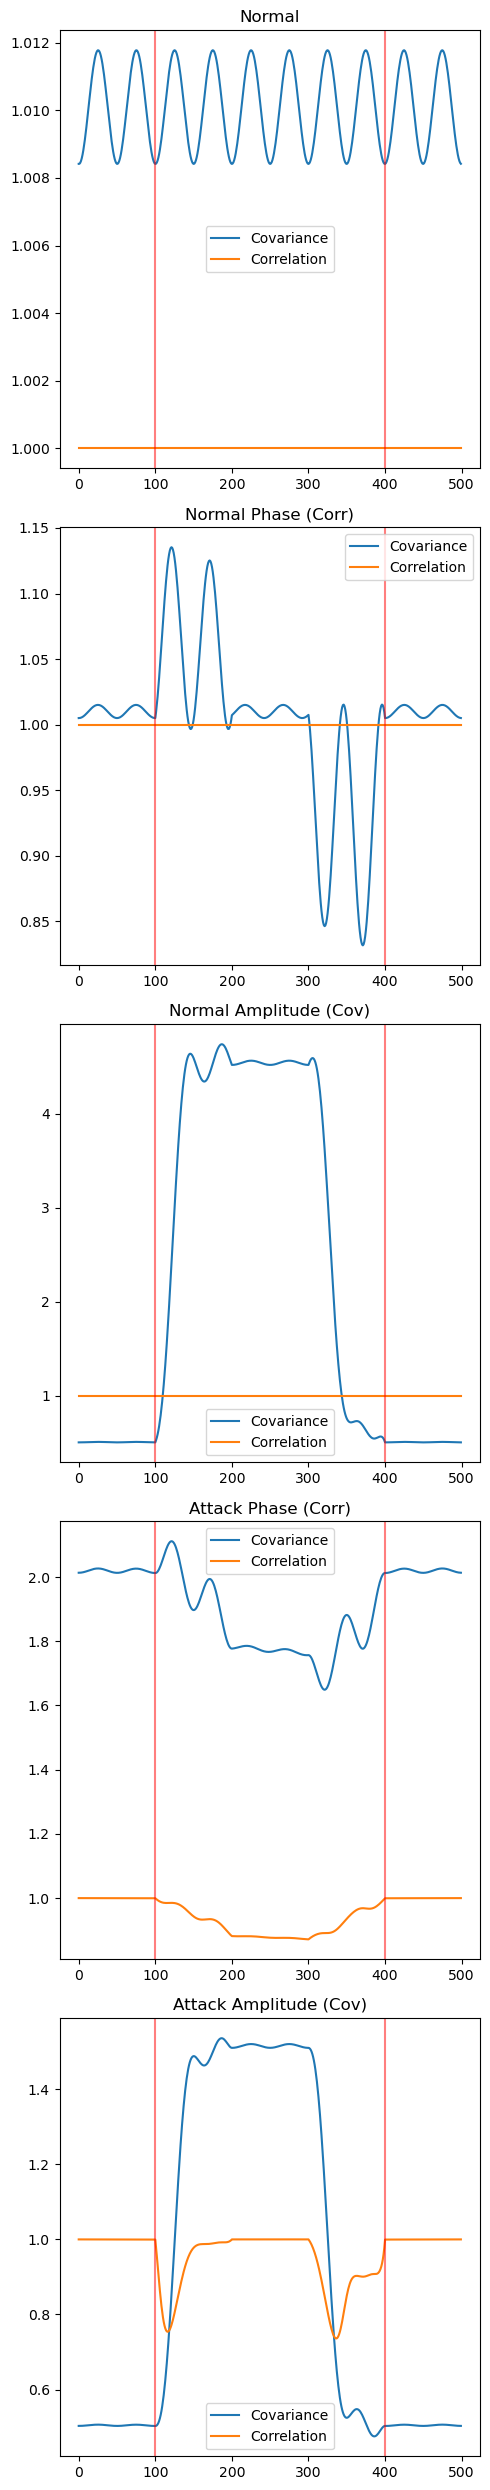

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot(x, y, ax, title):

    period = 100

    cov = [np.cov(x[i:i+period], y[i:i+period])[0,1] for i in range(len(x) - period)]
    corr = [np.corrcoef(x[i:i+period], y[i:i+period])[0,1] for i in range(len(x) - period)]

    ax.plot(cov, label="Covariance")
    ax.plot(corr, label="Correlation")
    ax.axvline(200-period, color="red", alpha=0.5)
    ax.axvline(400, color="red", alpha=0.5)
    ax.set_title(title)
    ax.legend()


# normal
shift = 0
x_range = np.linspace(0, 2 * 6 * np.pi, 600)
x = (np.array([np.sin(i) for i in x_range]))
y = x * 2
plt.title("Normal Raw Data")
plt.plot(x_range, x, label="x")
plt.plot(x_range, y, label="y")
plt.show()


fig, axes = plt.subplots(5, 1)
fig.set_size_inches(5, 25)
titles = ["Normal", "Normal Phase (Corr)",
                           "Normal Amplitude (Cov)", "Attack Phase (Corr)",
                           "Attack Amplitude (Cov)"]

plot(x, y, axes[0], titles[0])

# phase normal event: check corr (no change)
phase_shift = .5
x = np.array([np.sin(i) for i in np.linspace(0, 2 * 2 * np.pi, 200)] + \
             [np.sin(i) for i in np.linspace(phase_shift, 2 * 2 * np.pi+phase_shift, 200)]+ \
             [np.sin(i) for i in np.linspace(0, 2 * 2 * np.pi, 200)])
y = np.array([1+2*np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)] + \
             [1+2*np.sin(i) for i in np.linspace(shift+phase_shift, 2 * 2 * np.pi+shift+phase_shift, 200)]+ \
             [1+2*np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)])
plot(x, y, axes[1], titles[1])

# amplitude normal event: check cov (no change)
amp = 1.5
x = np.array([np.sin(i) for i in np.linspace(0, 2 * 2 * np.pi, 200)] + \
             [amp*(1+2*np.sin(i)) for i in np.linspace(0, 2 * 2 * np.pi, 200)]+ \
             [np.sin(i) for i in np.linspace(0, 2 * 2 * np.pi, 200)])
y = np.array([np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)] + \
             [amp*(1+2*np.sin(i)) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)]+ \
             [np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)])
plot(x, y, axes[2], titles[2])

# phase attack event: check corr
phase_shift = .5
x = np.array([1+2*np.sin(i) for i in np.linspace(0, 2 * 6 * np.pi, 600)])
y = np.array([1+2*np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)] + \
             [1+2*np.sin(i) for i in np.linspace(shift+phase_shift, 2 * 2 * np.pi+shift+phase_shift, 200)]+ \
             [1+2*np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)])
plot(x, y, axes[3], titles[3])

# amplitude attack event: check cov
amp = 1.5
x = np.array([np.sin(i) for i in np.linspace(0, 2 * 6 * np.pi, 600)])
y = np.array([np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)] + \
             [amp*(1+2*np.sin(i)) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)]+ \
             [np.sin(i) for i in np.linspace(shift, 2 * 2 * np.pi+shift, 200)])
plot(x, y, axes[-1], titles[-1])

plt.tight_layout()
plt.plot()